In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Importing the files

In [388]:
orgs=pd.read_csv(r"/home/omkar/Omkar Pawar/Data Science/JOB APPLICATION TASKS/Anomaly Detection Exercise/assets/candidate_eval_04/candidate_eval_04/data/orgs.csv")
devices=pd.read_csv(r"/home/omkar/Omkar Pawar/Data Science/JOB APPLICATION TASKS/Anomaly Detection Exercise/assets/candidate_eval_04/candidate_eval_04/data/devices.csv")
auth=pd.read_csv(r"/home/omkar/Omkar Pawar/Data Science/JOB APPLICATION TASKS/Anomaly Detection Exercise/assets/candidate_eval_04/candidate_eval_04/data/auth.csv")
users=pd.read_csv(r"/home/omkar/Omkar Pawar/Data Science/JOB APPLICATION TASKS/Anomaly Detection Exercise/assets/candidate_eval_04/candidate_eval_04/data/users.csv")

# Devices Table

device_id : device ID (PK)

type : the type of device (mobile, desktop, laptop, etc.)

os : operating system of the device (ios, windows, linux, etc.)

In [389]:
devices

,device_id,type,os
0,T9Y4L3GN,desktop,linux
1,HJNUR4IE,laptop,linux
2,EWDXU1I8,mobile,android
3,WB5L1NBI,mobile,ios
4,YMO16TKN,mobile,android
...,...,...,...
495,64J7XNZT,mobile,ios
496,A9NMTSGO,mobile,android
497,QYP90TKH,NaN,NaN
498,9JE5CZZE,mobile,android


In [390]:
devices.size

1500

In [391]:
devices.isna().sum()

device_id     0
type         29
os           57
dtype: int64

# missing value is present


In [392]:
devices.duplicated().value_counts()

False    500
Name: count, dtype: int64

In [393]:
devices=devices.dropna()
devices=devices.drop_duplicates()
devices.isnull().sum()

device_id    0
type         0
os           0
dtype: int64

In [394]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  443 non-null    object
 1   type       443 non-null    object
 2   os         443 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


droped missing value because missing value is very less campare to data

In [395]:
devices.size

1329

three type of device is present

In [396]:
devices['type'].unique()

array(['desktop', 'laptop', 'mobile'], dtype=object)

In [397]:
devices.shape

(443, 3)

In [398]:
devices.duplicated().any()

False

5 os is present


In [399]:
devices['os'].unique()

array(['linux', 'android', 'ios', 'windows', 'macos'], dtype=object)

# Authorization events
time : timestamp of authentication event

id : authentication event ID (PK)

device_id : Device ID (FK)

user_id : User ID (FK)

result : authentication attempt result { success : the user could access the service, failure
: unable to authenticate for any reason }

method : method of authentication (push, fingerprint, sms, etc.)

country : country associated with the authentication attempt

In [400]:
auth

,time,id,device_id,user_id,result,method,country
0,2022-01-01T00:00:00.000000,2S3QG0RI,1LJHRFGQ,h8bjzx051,success,sms,US
1,2022-01-01T01:00:00.000000,F7UM6L7G,0X5KWKBI,yquf02g05,success,sms,DE
2,2022-01-01T02:00:00.000000,3YDFTQZ1,CZ6I214Z,axgrj7naq,success,sms,JP
3,2022-01-01T03:00:00.000000,VD4MV9UK,4XUNKHKY,pxxk389fw,failure,push,DE
4,2022-01-01T04:00:00.000000,LBKNLAGY,G5FQGCG4,6wlsi25fe,success,fingerprint,US
...,...,...,...,...,...,...,...
49995,2027-09-15T03:00:00.000000,KG9Q2HOG,100SRMR8,jmh949xce,failure,sms,JP
49996,2027-09-15T04:00:00.000000,R64NBTSD,8P4NX6SL,6vv2hdh4j,success,fingerprint,JP
49997,2027-09-15T05:00:00.000000,ULOXIXP1,MCNYY9W8,41sw3r9tn,success,sms,NaN
49998,2027-09-15T06:00:00.000000,QK4YHC53,XCWEI7HM,v0ye3gb5i,failure,sms,US


Converting the time column from timestamp to date, as the time is not needed for analysis and then renamed the time column to the name date as it makes more sense.

In [401]:
# auth['time']= pd.to_datetime(auth['time']).dt.date
# auth=auth.rename(columns={'time':'Date'}) # Rename column

In [402]:
auth.head()

,time,id,device_id,user_id,result,method,country
0,2022-01-01T00:00:00.000000,2S3QG0RI,1LJHRFGQ,h8bjzx051,success,sms,US
1,2022-01-01T01:00:00.000000,F7UM6L7G,0X5KWKBI,yquf02g05,success,sms,DE
2,2022-01-01T02:00:00.000000,3YDFTQZ1,CZ6I214Z,axgrj7naq,success,sms,JP
3,2022-01-01T03:00:00.000000,VD4MV9UK,4XUNKHKY,pxxk389fw,failure,push,DE
4,2022-01-01T04:00:00.000000,LBKNLAGY,G5FQGCG4,6wlsi25fe,success,fingerprint,US


In [403]:
auth.size


350000

In [404]:
auth['method'].unique()

array(['sms', 'push', 'fingerprint', nan], dtype=object)

fill missing values and duplicates

In [405]:
auth.isna().sum()

time            0
id              0
device_id       0
user_id         0
result          0
method       2566
country      2497
dtype: int64

no duplicate present


In [406]:
duplicate_count = auth.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [407]:
auth['method'].fillna(auth['method'].mode()[0], inplace=True)
auth['country'].fillna(auth['country'].mode()[0], inplace=True)


In [408]:
auth.size

350000

In [409]:
#auth=auth.dropna()
#auth=auth.drop_duplicates()
auth

,time,id,device_id,user_id,result,method,country
0,2022-01-01T00:00:00.000000,2S3QG0RI,1LJHRFGQ,h8bjzx051,success,sms,US
1,2022-01-01T01:00:00.000000,F7UM6L7G,0X5KWKBI,yquf02g05,success,sms,DE
2,2022-01-01T02:00:00.000000,3YDFTQZ1,CZ6I214Z,axgrj7naq,success,sms,JP
3,2022-01-01T03:00:00.000000,VD4MV9UK,4XUNKHKY,pxxk389fw,failure,push,DE
4,2022-01-01T04:00:00.000000,LBKNLAGY,G5FQGCG4,6wlsi25fe,success,fingerprint,US
...,...,...,...,...,...,...,...
49995,2027-09-15T03:00:00.000000,KG9Q2HOG,100SRMR8,jmh949xce,failure,sms,JP
49996,2027-09-15T04:00:00.000000,R64NBTSD,8P4NX6SL,6vv2hdh4j,success,fingerprint,JP
49997,2027-09-15T05:00:00.000000,ULOXIXP1,MCNYY9W8,41sw3r9tn,success,sms,US
49998,2027-09-15T06:00:00.000000,QK4YHC53,XCWEI7HM,v0ye3gb5i,failure,sms,US


In [410]:
auth.isnull().sum()

time         0
id           0
device_id    0
user_id      0
result       0
method       0
country      0
dtype: int64

In [411]:
auth

,time,id,device_id,user_id,result,method,country
0,2022-01-01T00:00:00.000000,2S3QG0RI,1LJHRFGQ,h8bjzx051,success,sms,US
1,2022-01-01T01:00:00.000000,F7UM6L7G,0X5KWKBI,yquf02g05,success,sms,DE
2,2022-01-01T02:00:00.000000,3YDFTQZ1,CZ6I214Z,axgrj7naq,success,sms,JP
3,2022-01-01T03:00:00.000000,VD4MV9UK,4XUNKHKY,pxxk389fw,failure,push,DE
4,2022-01-01T04:00:00.000000,LBKNLAGY,G5FQGCG4,6wlsi25fe,success,fingerprint,US
...,...,...,...,...,...,...,...
49995,2027-09-15T03:00:00.000000,KG9Q2HOG,100SRMR8,jmh949xce,failure,sms,JP
49996,2027-09-15T04:00:00.000000,R64NBTSD,8P4NX6SL,6vv2hdh4j,success,fingerprint,JP
49997,2027-09-15T05:00:00.000000,ULOXIXP1,MCNYY9W8,41sw3r9tn,success,sms,US
49998,2027-09-15T06:00:00.000000,QK4YHC53,XCWEI7HM,v0ye3gb5i,failure,sms,US


In [412]:
devices.columns

Index(['device_id', 'type', 'os'], dtype='object')

In [413]:
orgs.columns

Index(['organization_id', 'start_date', 'type'], dtype='object')

In [414]:
users.columns

Index(['user_id', 'organization_id', 'start_date'], dtype='object')

In [415]:
mdf = auth.merge(users, on='user_id').merge(devices, on='device_id').merge(orgs, on='organization_id')

In [416]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44427 entries, 0 to 44426
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             44427 non-null  object
 1   id               44427 non-null  object
 2   device_id        44427 non-null  object
 3   user_id          44427 non-null  object
 4   result           44427 non-null  object
 5   method           44427 non-null  object
 6   country          44427 non-null  object
 7   organization_id  44427 non-null  object
 8   start_date_x     44427 non-null  object
 9   type_x           44427 non-null  object
 10  os               44427 non-null  object
 11  start_date_y     44427 non-null  object
 12  type_y           44427 non-null  object
dtypes: object(13)
memory usage: 4.4+ MB


In [417]:
mdf.head()

,time,id,device_id,user_id,result,method,country,organization_id,start_date_x,type_x,os,start_date_y,type_y
0,2022-01-01T00:00:00.000000,2S3QG0RI,1LJHRFGQ,h8bjzx051,success,sms,US,29R3UR,2022-10-27,mobile,ios,2022-03-25,llc
1,2022-01-05T20:00:00.000000,5EA6BHF8,LKXMMRUE,h8bjzx051,success,push,US,29R3UR,2022-10-27,mobile,android,2022-03-25,llc
2,2022-08-03T09:00:00.000000,QNS48UFW,LKXMMRUE,h8bjzx051,success,sms,US,29R3UR,2022-10-27,mobile,android,2022-03-25,llc
3,2023-12-01T21:00:00.000000,2VFRIPRC,LKXMMRUE,95w2cxsmw,failure,sms,JP,29R3UR,2022-11-26,mobile,android,2022-03-25,llc
4,2022-01-08T15:00:00.000000,RPSH8VOW,80GLY5SQ,h8bjzx051,success,sms,US,29R3UR,2022-10-27,laptop,macos,2022-03-25,llc


In [418]:
# Convert 'time' column to datetime
mdf['time'] = pd.to_datetime(mdf['time'])

# Extract date features
mdf['Year'] = mdf['time'].dt.year
mdf['Month'] = mdf['time'].dt.month
mdf['Day'] = mdf['time'].dt.day
mdf['Time'] = mdf['time'].dt.time  # Extracts the time component

# Drop the original 'time' column if needed
mdf.drop(columns=['time'], inplace=True)

In [419]:
# Apply one-hot encoding to 'method', 'country', and 'os' columns
mdf = pd.get_dummies(mdf, columns=['method', 'country', 'os', 'type_x', 'type_y', 'result'], drop_first=True)

In [420]:
mdf.columns

Index(['id', 'device_id', 'user_id', 'organization_id', 'start_date_x',
       'start_date_y', 'Year', 'Month', 'Day', 'Time', 'method_push',
       'method_sms', 'country_DE', 'country_GB', 'country_JP', 'country_US',
       'os_ios', 'os_linux', 'os_macos', 'os_windows', 'type_x_laptop',
       'type_x_mobile', 'type_y_llc', 'type_y_nonprofit', 'result_success'],
      dtype='object')

In [421]:
from sklearn.preprocessing import LabelEncoder
# Initialize label encoders
label_encoders = {}

# Apply label encoding to 'id', 'device_id', 'user_id', and 'organization_id'
categorical_columns = ['id', 'device_id', 'user_id', 'organization_id']
for column in categorical_columns:
    le = LabelEncoder()
    mdf[column] = le.fit_transform(mdf[column])
    label_encoders[column] = le

In [422]:
mdf.head()

,id,device_id,user_id,organization_id,start_date_x,start_date_y,Year,Month,Day,Time,...,country_US,os_ios,os_linux,os_macos,os_windows,type_x_laptop,type_x_mobile,type_y_llc,type_y_nonprofit,result_success
0,3441,23,98,0,2022-10-27,2022-03-25,2022,1,1,00:00:00,...,True,True,False,False,False,False,True,True,False,True
1,6680,267,98,0,2022-10-27,2022-03-25,2022,1,5,20:00:00,...,True,False,False,False,False,False,True,True,False,True
2,32783,267,98,0,2022-10-27,2022-03-25,2022,8,3,09:00:00,...,True,False,False,False,False,False,True,True,False,True
3,3554,267,55,0,2022-11-26,2022-03-25,2023,12,1,21:00:00,...,False,False,False,False,False,False,True,True,False,False
4,34081,97,98,0,2022-10-27,2022-03-25,2022,1,8,15:00:00,...,True,False,False,True,False,True,False,True,False,True


In [423]:
mdf.drop(columns=['start_date_x', 'start_date_y', 'Time'], inplace= True)

In [424]:
mdf

,id,device_id,user_id,organization_id,Year,Month,Day,method_push,method_sms,country_DE,...,country_US,os_ios,os_linux,os_macos,os_windows,type_x_laptop,type_x_mobile,type_y_llc,type_y_nonprofit,result_success
0,3441,23,98,0,2022,1,1,False,True,False,...,True,True,False,False,False,False,True,True,False,True
1,6680,267,98,0,2022,1,5,True,False,False,...,True,False,False,False,False,False,True,True,False,True
2,32783,267,98,0,2022,8,3,False,True,False,...,True,False,False,False,False,False,True,True,False,True
3,3554,267,55,0,2023,12,1,False,True,False,...,False,False,False,False,False,False,True,True,False,False
4,34081,97,98,0,2022,1,8,False,True,False,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44422,7116,82,4,25,2027,3,14,False,True,False,...,True,False,False,False,True,True,False,True,False,True
44423,15879,16,4,25,2026,9,15,False,True,False,...,True,True,False,False,False,False,True,True,False,True
44424,15064,72,4,25,2027,2,25,False,True,False,...,False,False,True,False,False,True,False,True,False,True
44425,6205,328,4,25,2025,6,17,True,False,False,...,True,False,False,True,False,True,False,True,False,False


In [425]:
from sklearn.ensemble import IsolationForest
# Create the model
isolation_forest = IsolationForest(contamination=0.05)  # Contamination is the expected proportion of anomalies

# Fit the model
isolation_forest.fit(mdf)
# Predict anomalies (outliers)
predictions = isolation_forest.predict(mdf)

# The predictions array will contain 1 for normal instances and -1 for anomalies


/home/omkar/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [426]:
# Assuming label_encoders contains the label encoders for 'user_id' and other categorical columns

# Get the indices of anomalies (-1 predictions)
anomaly_indices = [i for i, pred in enumerate(predictions) if pred == -1]

# Get the user IDs associated with anomalies
anomalous_user_ids = mdf.loc[anomaly_indices, 'user_id']

# Inverse transform the label-encoded user IDs
original_user_ids = label_encoders['user_id'].inverse_transform(anomalous_user_ids)

print("Original User IDs with anomalies:")
print(original_user_ids)


Original User IDs with anomalies:
['h8bjzx051' '4df38bz6u' '95w2cxsmw' ... '0xeakun4p' '0xeakun4p'
 '0xeakun4p']


In [456]:
len(original_user_ids)

2222

In [427]:
predictions

array([ 1,  1,  1, ...,  1,  1, -1])

In [428]:
auth.duplicated().any()

False

In [429]:
auth['result'].unique()

array(['success', 'failure'], dtype=object)

In [430]:
auth['method'].unique()

array(['sms', 'push', 'fingerprint'], dtype=object)

In [431]:
auth['country'].unique()

array(['US', 'DE', 'JP', 'CH', 'GB'], dtype=object)

In [432]:
auth['result'].value_counts()

result
success    29972
failure    20028
Name: count, dtype: int64

In [433]:
auth['method'].value_counts()

method
sms            27537
fingerprint    12539
push            9924
Name: count, dtype: int64

In [434]:
auth['country'].value_counts()

country
US    27533
DE     9888
JP     5072
GB     4943
CH     2564
Name: count, dtype: int64

In [435]:
'''label_encoder=LabelEncoder()
auth['result_']=label_encoder.fit_transform(auth['result'])
auth['method_']=label_encoder.fit_transform(auth['method'])
auth['country_']=label_encoder.fit_transform(auth['country'])'''

"label_encoder=LabelEncoder()\nauth['result_']=label_encoder.fit_transform(auth['result'])\nauth['method_']=label_encoder.fit_transform(auth['method'])\nauth['country_']=label_encoder.fit_transform(auth['country'])"

In [436]:
auth.head()

,time,id,device_id,user_id,result,method,country
0,2022-01-01T00:00:00.000000,2S3QG0RI,1LJHRFGQ,h8bjzx051,success,sms,US
1,2022-01-01T01:00:00.000000,F7UM6L7G,0X5KWKBI,yquf02g05,success,sms,DE
2,2022-01-01T02:00:00.000000,3YDFTQZ1,CZ6I214Z,axgrj7naq,success,sms,JP
3,2022-01-01T03:00:00.000000,VD4MV9UK,4XUNKHKY,pxxk389fw,failure,push,DE
4,2022-01-01T04:00:00.000000,LBKNLAGY,G5FQGCG4,6wlsi25fe,success,fingerprint,US


# Users Info
user_id : User ID (PK)

organization_id : organization ID (FK)

start_date : date the organization joined

In [437]:
users

,user_id,organization_id,start_date
0,b716bizfd,O943NR,2022-12-18
1,70gdkxccc,CTKX9E,2020-09-21
2,k3f47fr6e,IIA9QG,2021-03-07
3,73v9elx98,L3C8TJ,2022-09-02
4,25wvuz5lj,6EZAOI,2022-12-27
...,...,...,...
195,rgavn0zdx,JGO77O,2021-08-09
196,2j1kkezv0,L3C8TJ,2022-08-31
197,3jg3nnu61,A079YU,2022-03-02
198,q1x6xmmb6,TOZ9LO,2022-09-28


no missing value present

In [438]:
users.isnull().sum()

user_id            0
organization_id    0
start_date         0
dtype: int64

no duplicate present

In [439]:
users.duplicated().any()

False

# organization information

organization_id : organization ID (PK)

type : type of organization (corporation, llc, nonprofit, etc.)

start_date : date the organization joined

In [440]:
orgs.head()

,organization_id,start_date,type
0,9B2ZSN,2021-05-30,nonprofit
1,A079YU,2022-01-05,corporation
2,YJQKA0,2021-01-30,corporation
3,QFALP3,2020-07-19,nonprofit
4,MMEM26,2022-06-17,corporation


no duplicate and null value present

In [441]:
orgs.isnull().sum()

organization_id    0
start_date         0
type               0
dtype: int64

In [442]:
orgs.duplicated().any()

False

In [443]:
devices

,device_id,type,os
0,T9Y4L3GN,desktop,linux
1,HJNUR4IE,laptop,linux
2,EWDXU1I8,mobile,android
3,WB5L1NBI,mobile,ios
4,YMO16TKN,mobile,android
...,...,...,...
494,7X4L39WD,laptop,macos
495,64J7XNZT,mobile,ios
496,A9NMTSGO,mobile,android
498,9JE5CZZE,mobile,android


In [444]:
users

,user_id,organization_id,start_date
0,b716bizfd,O943NR,2022-12-18
1,70gdkxccc,CTKX9E,2020-09-21
2,k3f47fr6e,IIA9QG,2021-03-07
3,73v9elx98,L3C8TJ,2022-09-02
4,25wvuz5lj,6EZAOI,2022-12-27
...,...,...,...
195,rgavn0zdx,JGO77O,2021-08-09
196,2j1kkezv0,L3C8TJ,2022-08-31
197,3jg3nnu61,A079YU,2022-03-02
198,q1x6xmmb6,TOZ9LO,2022-09-28


In [445]:
orgs

,organization_id,start_date,type
0,9B2ZSN,2021-05-30,nonprofit
1,A079YU,2022-01-05,corporation
2,YJQKA0,2021-01-30,corporation
3,QFALP3,2020-07-19,nonprofit
4,MMEM26,2022-06-17,corporation
5,9H0IZE,2021-11-29,corporation
6,N6EKP0,2022-05-07,corporation
7,IIA9QG,2020-06-09,corporation
8,29R3UR,2022-03-25,llc
9,SRF85Q,2022-07-19,llc


In [446]:
auth

,time,id,device_id,user_id,result,method,country
0,2022-01-01T00:00:00.000000,2S3QG0RI,1LJHRFGQ,h8bjzx051,success,sms,US
1,2022-01-01T01:00:00.000000,F7UM6L7G,0X5KWKBI,yquf02g05,success,sms,DE
2,2022-01-01T02:00:00.000000,3YDFTQZ1,CZ6I214Z,axgrj7naq,success,sms,JP
3,2022-01-01T03:00:00.000000,VD4MV9UK,4XUNKHKY,pxxk389fw,failure,push,DE
4,2022-01-01T04:00:00.000000,LBKNLAGY,G5FQGCG4,6wlsi25fe,success,fingerprint,US
...,...,...,...,...,...,...,...
49995,2027-09-15T03:00:00.000000,KG9Q2HOG,100SRMR8,jmh949xce,failure,sms,JP
49996,2027-09-15T04:00:00.000000,R64NBTSD,8P4NX6SL,6vv2hdh4j,success,fingerprint,JP
49997,2027-09-15T05:00:00.000000,ULOXIXP1,MCNYY9W8,41sw3r9tn,success,sms,US
49998,2027-09-15T06:00:00.000000,QK4YHC53,XCWEI7HM,v0ye3gb5i,failure,sms,US


In [447]:
merged_df = auth.merge(users, on='user_id').merge(devices, on='device_id').merge(orgs, on='organization_id')

In [448]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44427 entries, 0 to 44426
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             44427 non-null  object
 1   id               44427 non-null  object
 2   device_id        44427 non-null  object
 3   user_id          44427 non-null  object
 4   result           44427 non-null  object
 5   method           44427 non-null  object
 6   country          44427 non-null  object
 7   organization_id  44427 non-null  object
 8   start_date_x     44427 non-null  object
 9   type_x           44427 non-null  object
 10  os               44427 non-null  object
 11  start_date_y     44427 non-null  object
 12  type_y           44427 non-null  object
dtypes: object(13)
memory usage: 4.4+ MB


In [449]:
merged_df.columns


Index(['time', 'id', 'device_id', 'user_id', 'result', 'method', 'country',
       'organization_id', 'start_date_x', 'type_x', 'os', 'start_date_y',
       'type_y'],
      dtype='object')

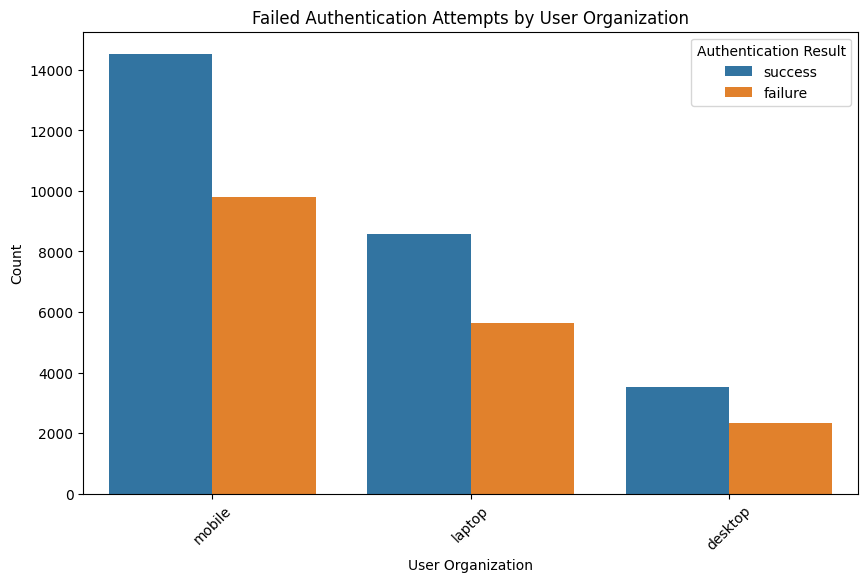

In [450]:
# Visualize failed authentication attempts by user organization
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='type_x', hue='result')
plt.title('Failed Authentication Attempts by User Organization')
plt.xlabel('User Organization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Authentication Result')
plt.show()

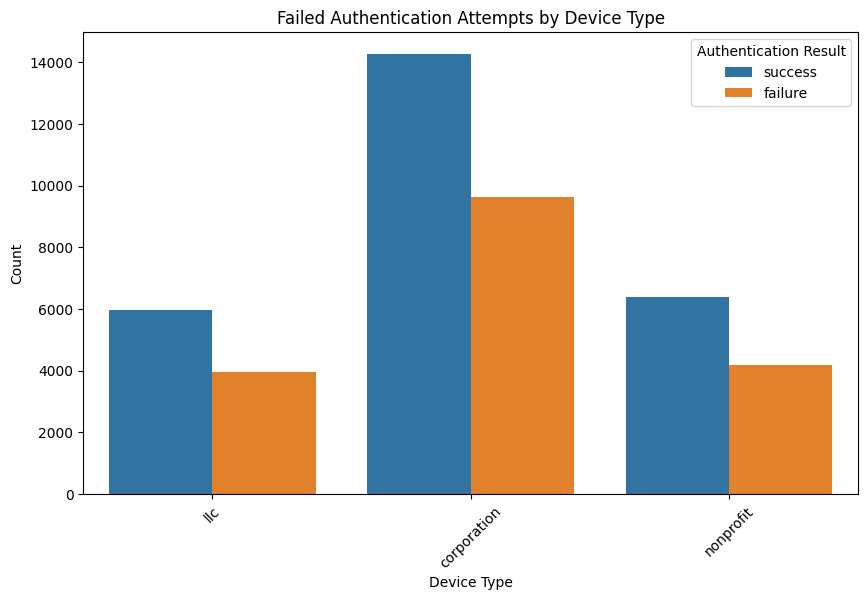

In [451]:
# Visualize failed authentication attempts by device type
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='type_y', hue='result')
plt.title('Failed Authentication Attempts by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Authentication Result')
plt.show()

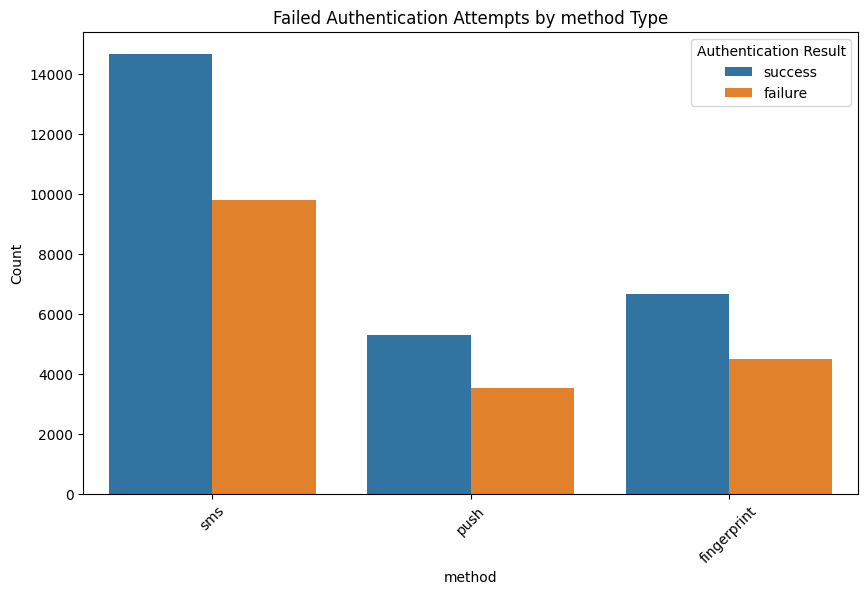

In [452]:
# Visualize failed authentication attempts by device type
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='method', hue='result')
plt.title('Failed Authentication Attempts by method Type')
plt.xlabel('method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Authentication Result')
plt.show()

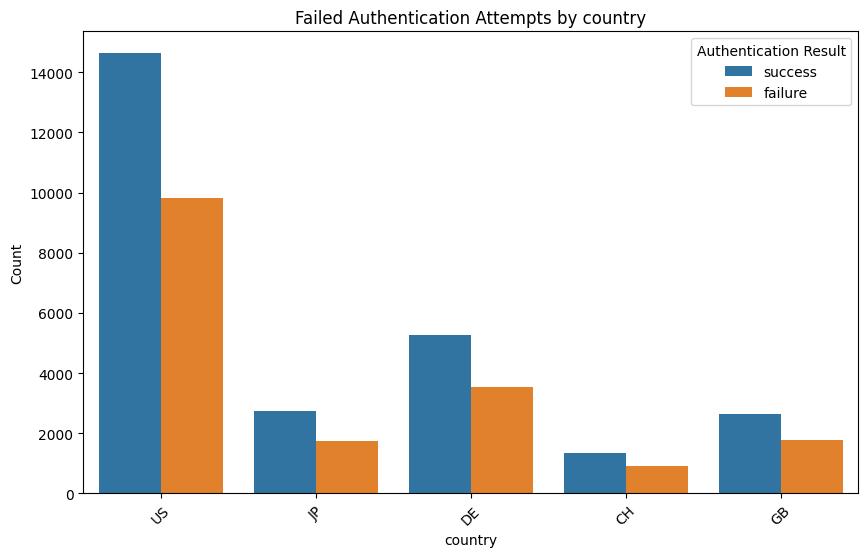

In [453]:
# Visualize failed authentication attempts by device type
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='country', hue='result')
plt.title('Failed Authentication Attempts by country')
plt.xlabel('country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Authentication Result')
plt.show()

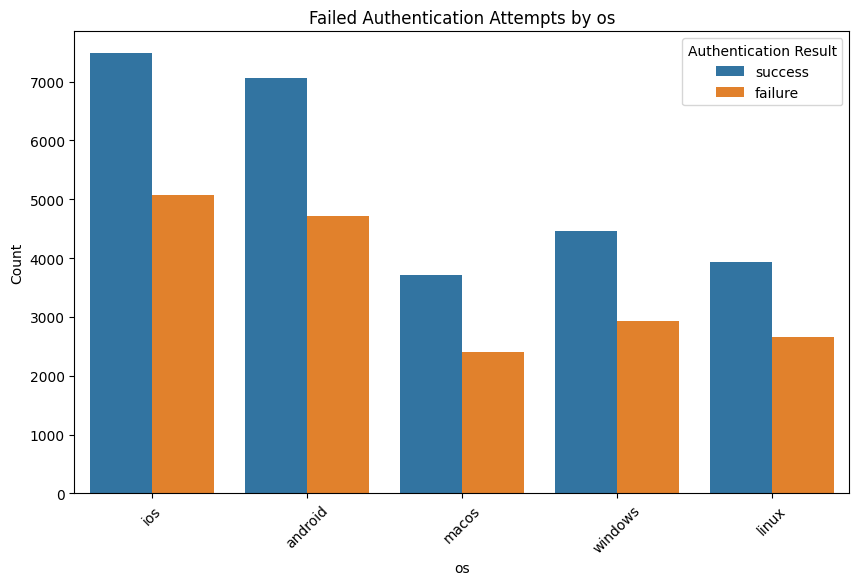

In [454]:
# Visualize failed authentication attempts by device type
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='os', hue='result')
plt.title('Failed Authentication Attempts by os')
plt.xlabel('os')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Authentication Result')
plt.show()